In [1]:
install.packages(c("deSolve", "ggplot2", "reshape2"))

also installing the dependency 'isoband'



package 'isoband' successfully unpacked and MD5 sums checked
package 'deSolve' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HIMANSHU\AppData\Local\Temp\Rtmpo1WMHi\downloaded_packages


In [2]:
library(deSolve)
library(reshape2)
library(ggplot2)

Warning message:
"package 'deSolve' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
initial_number_infected <- 1000000
initial_number_recovered <- 0
initial_number_mortality <- 0
recovery_rate <- 0.1
mortality_rate <- 0.2
follow_up_duration <- 4*7

In [4]:
initial_state_values <- c(I = initial_number_infected, R = initial_number_recovered, M = initial_number_mortality) 
parameters <- c(gamma = recovery_rate, mu = mortality_rate)
times <- seq(from = 0, to = follow_up_duration, by=1)



In [5]:
initial_state_values
parameters
times

I     R     M 
1e+06 0e+00 0e+00

gamma    mu 
  0.1   0.2

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28

In [10]:
cohort_model <- function(time, state, parameters){
    with(as.list(c(state, parameters)), {
        dI <- -gamma*I-mu*I
        dR <- gamma*I
        dM <- mu*I
        return(list(c(dI, dR, dM)))
    })
}

In [12]:
library(deSolve)
library(reshape2)
library(ggplot2)

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

In [13]:
output

time,I,R,M
0,1000000.0000,0.00,0.0
1,740818.2240,86393.93,172787.9
2,548811.6238,150396.13,300792.3
3,406569.6441,197810.12,395620.2
4,301194.1295,232935.29,465870.6
5,223130.0332,258956.66,517913.3
6,165298.7445,278233.75,556467.5
7,122456.2989,292514.57,585029.1
8,90717.8284,303094.06,606188.1
9,67205.4086,310931.53,621863.1


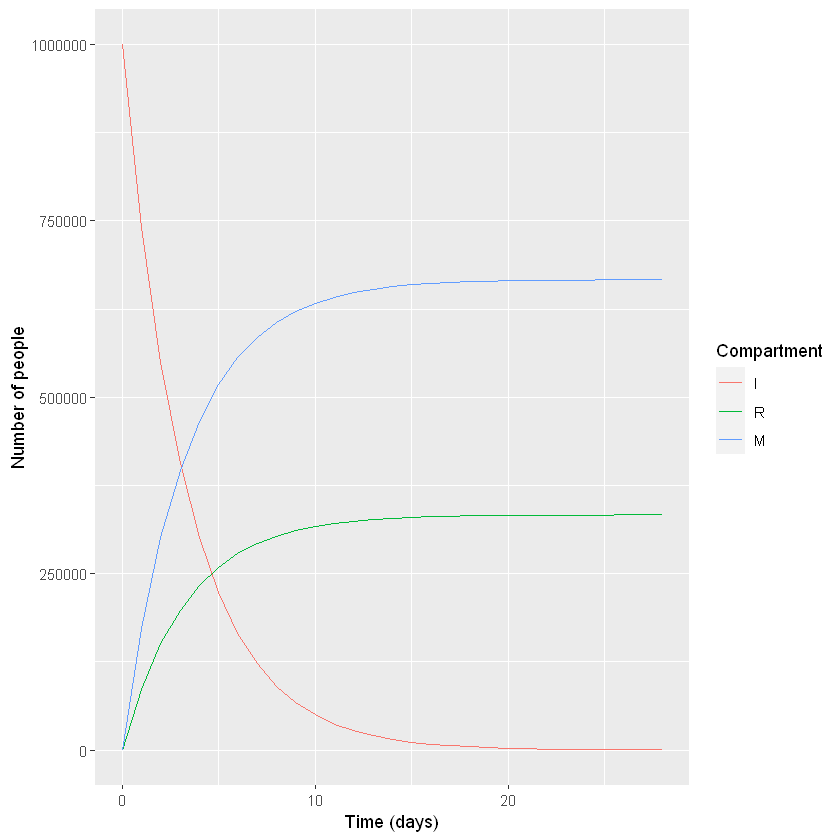

In [14]:
output_long <- melt(as.data.frame(output), id = 'time')

ggplot(data = output_long,
      aes(x = time, y = value, colour = variable, group = variable))+
geom_line()+
xlab("Time (days)")+
ylab("Number of people")+
labs(colour = "Compartment")

In [16]:
output[output$time == 28,]

,time,I,R,M
29,28,224.8659,333258.4,666516.8


In [18]:
output[29, "M"] 

[1] 666516.8

In [17]:
output[29, "M"]/1000000 # #based on the model output, what proportion of the initially infected
#cohort died before recovering over the 4 week period?

[1] 0.6665168

In [19]:
# case fatality rate or CFR given by-

CFR = parameters["mu"]/(parameters["mu"] + parameters["gamma"]) 

In [23]:
CFR

mu 
0.6666667

In [25]:
mortality_rate = 0.1
parameters <- c(mu = mortality_rate, gamma = recovery_rate)
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

In [26]:
output

time,I,R,M
0,1000000.000,0.00,0.00
1,818730.757,90634.62,90634.62
2,670320.048,164839.98,164839.98
3,548811.620,225594.19,225594.19
4,449328.944,275335.53,275335.53
5,367879.419,316060.29,316060.29
6,301194.148,349402.93,349402.93
7,246596.860,376701.57,376701.57
8,201896.403,399051.80,399051.80
9,165298.768,417350.62,417350.62


In [27]:
output[28, "M"]

[1] 497741.7

In [28]:
# calculating case fatality rate

output[28, "M"]/1000000

[1] 0.4977417

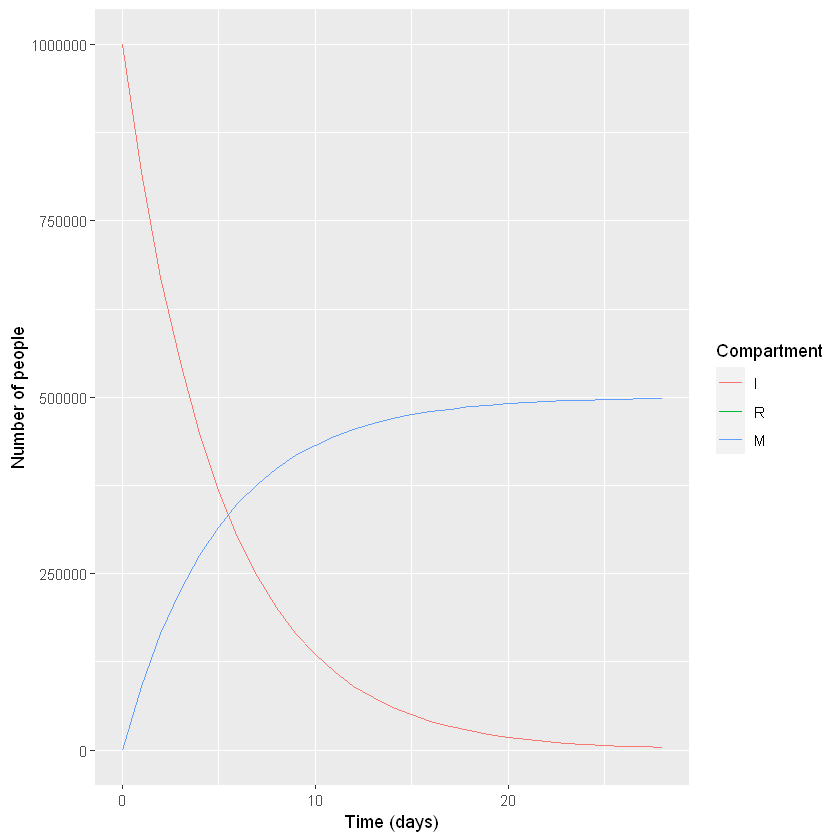

In [29]:
output_long <- melt(as.data.frame(output), id = 'time')

ggplot(data = output_long,
      aes(x = time, y = value, colour = variable, group = variable))+
geom_line()+
xlab("Time (days)")+
ylab("Number of people")+
labs(colour = "Compartment")

In [30]:
# case fatality rate or CFR given by-

CFR = parameters["mu"]/(parameters["mu"] + parameters["gamma"])

In [31]:
CFR

mu 
0.5